In [27]:
from lsh_helpers import *
import networkx as nx
import matplotlib.pyplot as plt
import random
import Levenshtein

In [86]:
def build_schema(lshensemble, index_dict):
    sgraph = nx.DiGraph()
    edge_labels={}
    # loop through index dict and search for containment relationships, if found, 
    # add an edge between those 2 tables with edge label as the "join" condition
    for k,v in index_dict.items():
        try:
            candidates = search_index(lshensemble, index_dict, v['table'], v['col'])
        except ZeroDivisionError:
            continue
        if(candidates):
            for c in candidates:
                ctable, ccol = c.split('->')
                if(ctable==v['table']):
                    continue
                rnum = random.random()
                if(rnum<0.00005):
                    if(Levenshtein.distance(v['table'], ctable)<=len(v['table'])/5):
                        sgraph.add_edge(v['table'], ctable)
                        edge_labels[(v['table'], ctable)] = \
                        (f"{v['col']}---{ccol}", 'blue')
                    else:
                        sgraph.add_edge(v['table'], ctable)
                        edge_labels[(v['table'], ctable)] = \
                        (f"{v['col']}---{ccol}", 'red')
    
    return edge_labels, sgraph


In [101]:
def draw_graph(sgraph, edges):
    
    pos = nx.random_layout(sgraph)
    
    edge_colors = []
    
    for e in sgraph.edges:
        edge_colors.append(edges[e][1])
        
    nx.draw(
    sgraph, pos, edge_color=edge_colors, width=0.1, linewidths=1,
    node_size=20, node_color='pink', alpha=0.9,font_size=3,
    with_labels=True
    )
    
    nx.draw_networkx_edge_labels(
    sgraph, pos,
    edge_labels=edge_labels,
    font_color='black',
    font_size = 2
    )
    
    plt.figure(1, figsize=(1500, 1500), dpi=1000)
    plt.savefig(f'sgraph.png',dpi=1000)
    
#     return edge_labels

In [30]:
# create a graph structure based on containment threshold

In [31]:
if __name__ =='__main__':
    conn = psycopg2.connect("dbname=curation_data_lake user=postgres")
#     conn = psycopg2.connect("dbname=test_hash_db user=postgres")
    conn.autocommit=True
#     create_and_serialize_index(conn, 'april16hashes',num_perm=256, thresh=0.8)

In [32]:
lshensemble, index_dict = load_index(conn, index_table='april16hashes', threshold=0.9,num_perm=256)

/home/opc/chenjie/cs520/lib/python3.6/site-packages/datasketch/lshensemble_partition.py:72: RuntimeWarning: invalid value encountered in true_divide
  return np.sum((float(sizes[u])-sizes[l:u+1])/float(sizes[u])*counts[l:u+1])


In [87]:
edges,graph_obj = build_schema(lshensemble, index_dict)

In [88]:
len(graph_obj.edges)

7

In [89]:
edges

{('strategic_subject_list__historical',
  'parks__locations_deprecated_november_2016'): ('PREDICTOR RAT GANG AFFILIATION---DOG-FRIENDLY',
  'red'),
 ('violence_reduction__victims_of_homicides_and_nonfatal_shootings',
  'flu_shot_clinic_locations__2012'): ('DISTRICT---Ward', 'red'),
 ('chicago_public_schools__school_progress_reports_sy1819',
  'chicago_public_schools__school_progress_reports_sy1617'): ('School_Survey_Safety---School_Survey_Supportive_Environment',
  'blue'),
 ('chicago_public_schools__elementary_school_progress_report_20132',
  'chicago_public_schools__school_admissions_information_sy2021'): ('School ID---School_ID',
  'red'),
 ('public_health_statistics__selected_underlying_causes_of_death_i',
  'covid19_daily_vaccinations__chicago_residents'): ('Adjusted Rate Rank---Vaccine Series Completed - Daily - American Indian/Alaska Nativ',
  'red'),
 ('parks__locations_deprecated_november_2016',
  'influenza_surveillance_weekly'): ('CONSERVATORY---PEDIATRIC_DEATHS', 'red'),
 (

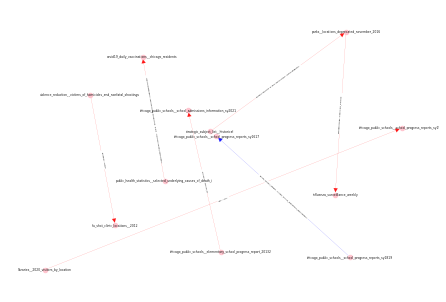

In [102]:
draw_graph(graph_obj, edges)